In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

# 파일 호출, 변수명 및 불러오기 경로는 자신에게 맞게 변경해주시면 됩니다.

In [2]:
import os
files_path = f'data/TB_TAT_KAMIS_PRC_MK_TB/'
files = os.listdir(files_path)
print(files)

['TB_TAT_KAMIS_PRC_MK_TB-2005.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2006.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2007.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2008.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2009.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2010.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2011.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2012.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2013.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2014.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2015.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2016.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2017.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2018.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2019.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2020.csv']


In [3]:
df = pd.DataFrame()
for file in files:
    df_sub = pd.read_csv(f'{files_path}/{file}', encoding='cp949', low_memory=False)
    df_sub = df_sub[['PRCE_REG_YMD', 'CTNP_NM', 'PDLT_NM', 'EXMN_SE_NM', 'BULK_GRAD_NM', 'PDLT_PRCE']]
    df_sub = df_sub[~df_sub['PDLT_NM'].isna()]
    df_sub.columns=['YMD', 'Region', 'Product', 'WR', 'Grade', 'Price']
    df = pd.concat([df, df_sub])

# 1. 년·월·일 에서 연·월 로 변경
# 2. Y(년), M(월) 컬럼 생성

In [4]:
df['YMD'] = df['YMD'].astype(str)
df['YMD'] = df['YMD'].map(lambda x:x[:6])

df['Y'] = df['YMD'].map(lambda x:x[:4]).astype('int16')
df['M'] = df['YMD'].map(lambda x:x[4:]).astype('int8')

In [5]:
# 20년 데이터만 있는 품목 제외

df = df[~df['Product'].isin(['즉석밥', '두부', '김치', '고추장', '된장', '간장', '맛김(조미김)', '콩나물'])]

In [6]:
# Wholesale : 도매
df_w = df[df['WR']=='도매']

In [7]:
# Retail : 소매
df_r = df[df['WR']=='소매']

In [8]:
product_w = df_w['Product'].unique()
product_w = product_w.tolist()

In [9]:
product_r = df_r['Product'].unique()
product_r = product_r.tolist()

# 물가지수 파일과 겹치는 품목 확인

In [11]:
df_1 = pd.read_csv(f'소비자물가지수_품목별_연도별_월별_filtered.csv')

In [12]:
df_1['품목별'].unique()

array(['총지수', '농축수산물', '\u3000\u3000\u3000(농산물)곡물',
       '\u3000\u3000\u3000\u3000\u3000\u3000쌀',
       '\u3000\u3000\u3000\u3000\u3000\u3000현미',
       '\u3000\u3000\u3000\u3000\u3000\u3000찹쌀',
       '\u3000\u3000\u3000\u3000\u3000\u3000보리쌀',
       '\u3000\u3000\u3000\u3000\u3000\u3000콩',
       '\u3000\u3000\u3000\u3000\u3000\u3000땅콩',
       '\u3000\u3000\u3000\u3000\u3000\u3000혼식곡',
       '\u3000\u3000\u3000(농산물)채소',
       '\u3000\u3000\u3000\u3000\u3000\u3000배추',
       '\u3000\u3000\u3000\u3000\u3000\u3000상추',
       '\u3000\u3000\u3000\u3000\u3000\u3000시금치',
       '\u3000\u3000\u3000\u3000\u3000\u3000양배추',
       '\u3000\u3000\u3000\u3000\u3000\u3000미나리',
       '\u3000\u3000\u3000\u3000\u3000\u3000깻잎',
       '\u3000\u3000\u3000\u3000\u3000\u3000부추',
       '\u3000\u3000\u3000\u3000\u3000\u3000무',
       '\u3000\u3000\u3000\u3000\u3000\u3000열무',
       '\u3000\u3000\u3000\u3000\u3000\u3000당근',
       '\u3000\u3000\u3000\u3000\u3000\u3000감자',
       '\u3000\u3000\u3000\u

In [13]:
# replace로 \u3000 값이 사라지지 않는다.. 이유는 모르겠음
df_1['품목별'] = df_1['품목별'].replace('\u3000', '')

In [14]:
df_1['품목별'] = df_1['품목별'].map(lambda x:x.strip(('\u3000')))

In [15]:
df_1['품목별'].unique()

array(['총지수', '농축수산물', '(농산물)곡물', '쌀', '현미', '찹쌀', '보리쌀', '콩', '땅콩',
       '혼식곡', '(농산물)채소', '배추', '상추', '시금치', '양배추', '미나리', '깻잎', '부추', '무',
       '열무', '당근', '감자', '고구마', '도라지', '콩나물', '버섯', '오이', '풋고추', '호박',
       '가지', '토마토', '파', '양파', '마늘', '브로콜리', '고사리', '파프리카', '생강',
       '(농산물)과실', '사과', '배', '복숭아', '포도', '밤', '감', '귤', '오렌지', '참외',
       '수박', '딸기', '바나나', '키위'], dtype=object)

In [16]:
df['Product'].unique()

array(['쌀', '찹쌀', '콩', '팥', '녹두', '메밀', '고구마', '감자', '배추', '양배추', '시금치',
       '상추', '수박', '오이', '호박', '토마토', '무', '당근', '건고추', '풋고추', '붉은고추',
       '피마늘', '깐마늘(국산)', '깐마늘(수입)', '양파', '파', '생강', '미나리', '깻잎', '피망',
       '참깨', '들깨', '땅콩', '느타리버섯', '팽이버섯', '사과', '배', '포도', '감귤', '단감',
       '바나나', '참다래', '오렌지', '방울토마토', '고등어', '갈치', '명태', '물오징어', '건멸치',
       '북어', '건오징어', '김', '건미역', '굴', '수입조기', '돼지고기', '닭고기', '계란', '우유',
       '딸기', '참외', '복숭아', '쇠고기', '파프리카', '멜론', '새송이버섯', '얼갈이배추', '열무',
       '건포도', '건블루베리', '레몬', '체리', '아몬드', '자몽', '호두', '고춧가루', '굵은소금',
       '멸치액젓', '새우젓', '망고', '파인애플', '갓', '가지', '부추', '새우', '전복', '꽁치',
       '브로콜리', '청경채', '케일', '양송이버섯', '표고버섯', '귀리', '보리', '수수', '율무',
       '양상추', '혼합곡'], dtype=object)

In [17]:
df_1.loc[df_1['품목별']=='마늘', ['품목별']] = '피마늘'

In [18]:
Product_list=[]

for i in df['Product'].unique():
    if i in df_1['품목별'].unique():
        Product_list.append(i)

print(Product_list)

['쌀', '찹쌀', '콩', '고구마', '감자', '배추', '양배추', '시금치', '상추', '수박', '오이', '호박', '토마토', '무', '당근', '풋고추', '피마늘', '양파', '파', '생강', '미나리', '깻잎', '땅콩', '사과', '배', '포도', '바나나', '오렌지', '딸기', '참외', '복숭아', '파프리카', '열무', '가지', '부추', '브로콜리']


In [19]:
len(Product_list)

36

# 함수 구현

In [23]:
def AgriMarket_AutoEDA(product:str, year:tuple) -> None:

    # input
    # product = input('품목을 입력하세요. : ')
    # start = int(input('시작 연도를 입력하세요. (4자리) : '))
    # end = int(input('끝 연도를 입력하세요. (4자리) : '))
    # print()
    start = year[0]
    end = year[1]
    
    
    if product not in product_w:
        print('해당 제품의 도매 거래내역이 없습니다.')
    
    elif ((min(df_w[df_w['Product']==product]['Y']) > end) | (max(df_w[df_w['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 도매 거래내역이 없습니다.')  
    
    else:
        df_w[(df_w['Product']==product) & (df_w['Y'] >= start) & (df_w['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 도매가격 변동 그래프', fontsize=20)

    
    if product not in product_r:
        print('해당 제품의 소매 거래내역이 없습니다.')
    
    elif ((min(df_r[df_r['Product']==product]['Y']) > end) | (max(df_r[df_r['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 소매 거래내역이 없습니다.')
        
    else:
        df_r[(df_r['Product']==product) & (df_r['Y'] >= start) & (df_r['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 소매가격 변동 그래프', fontsize=20)

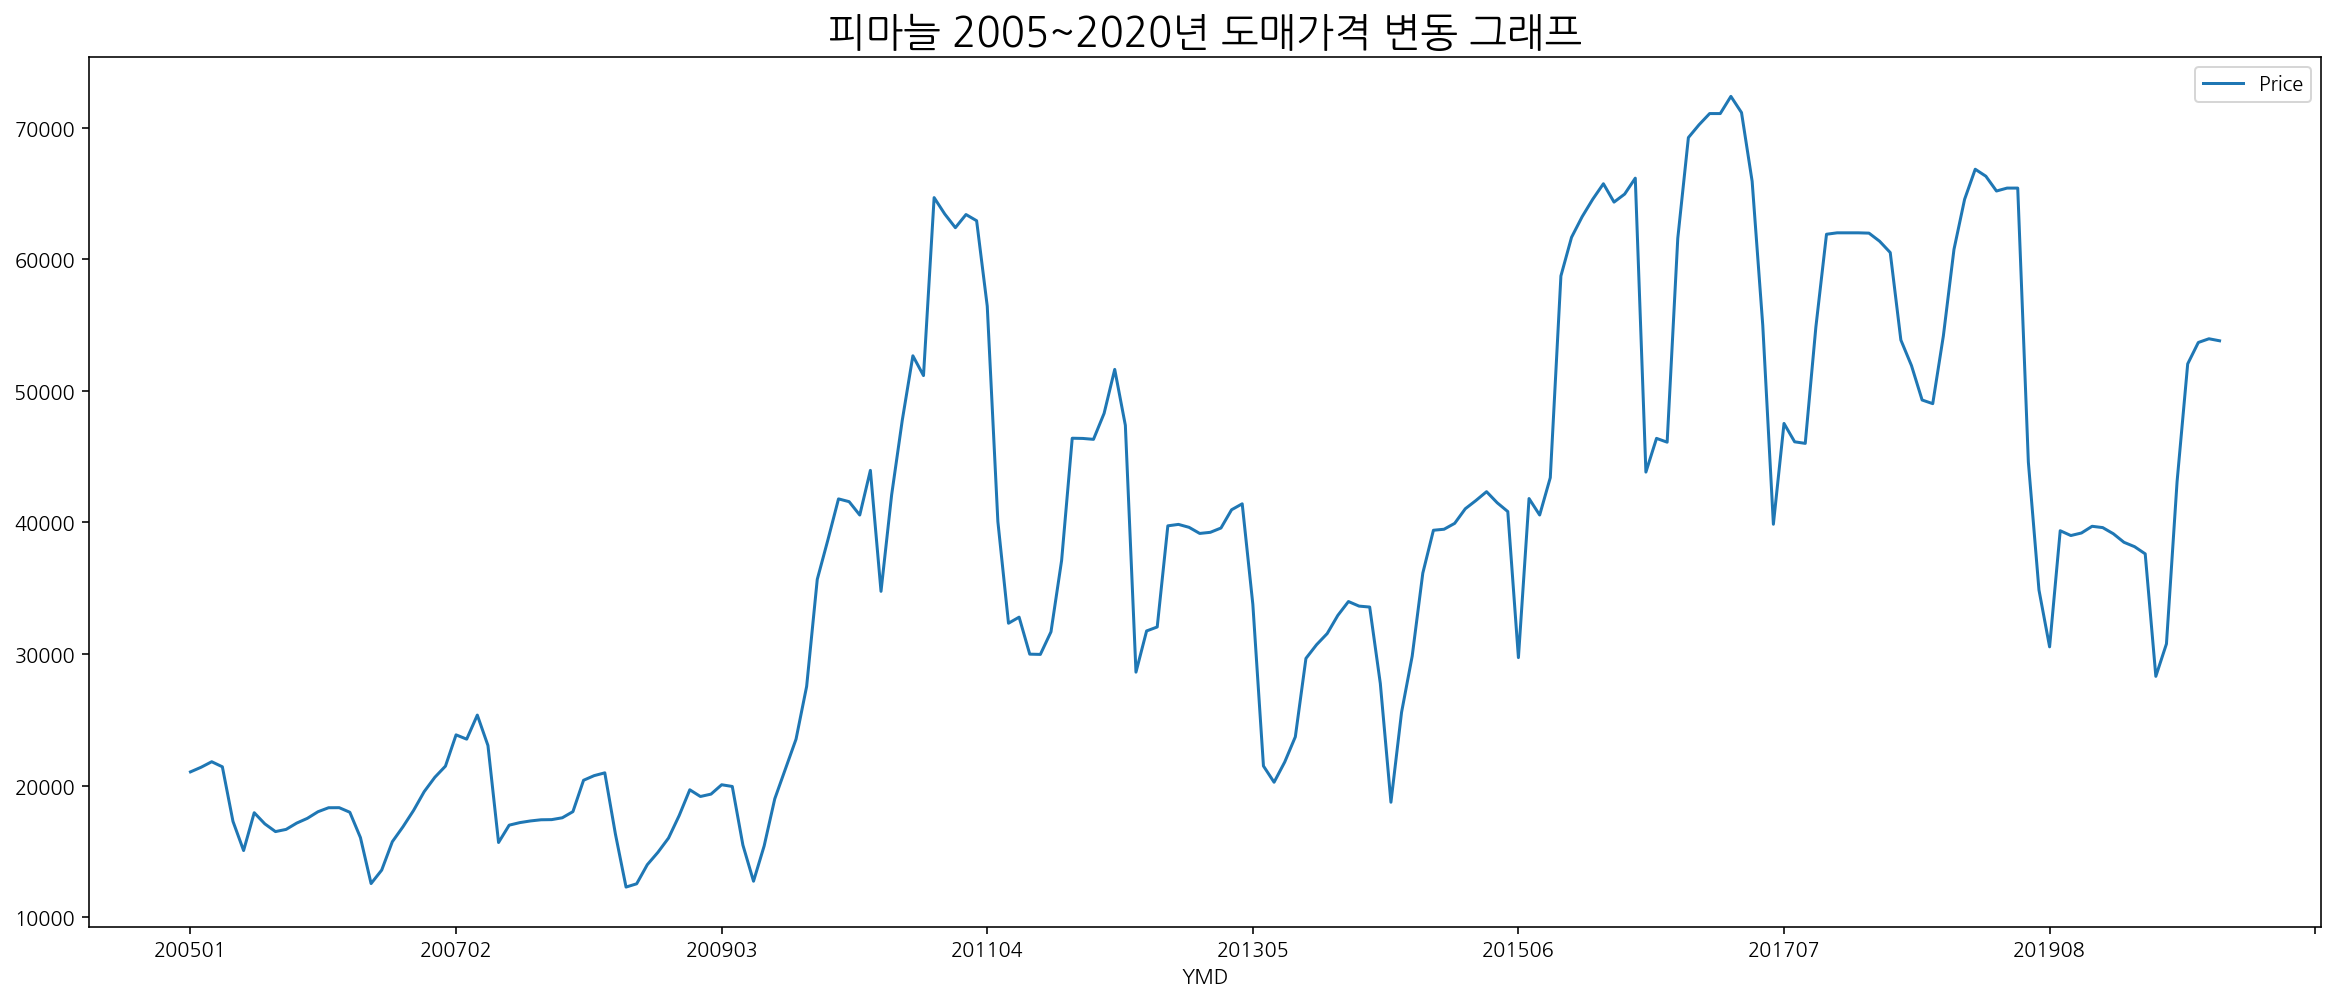

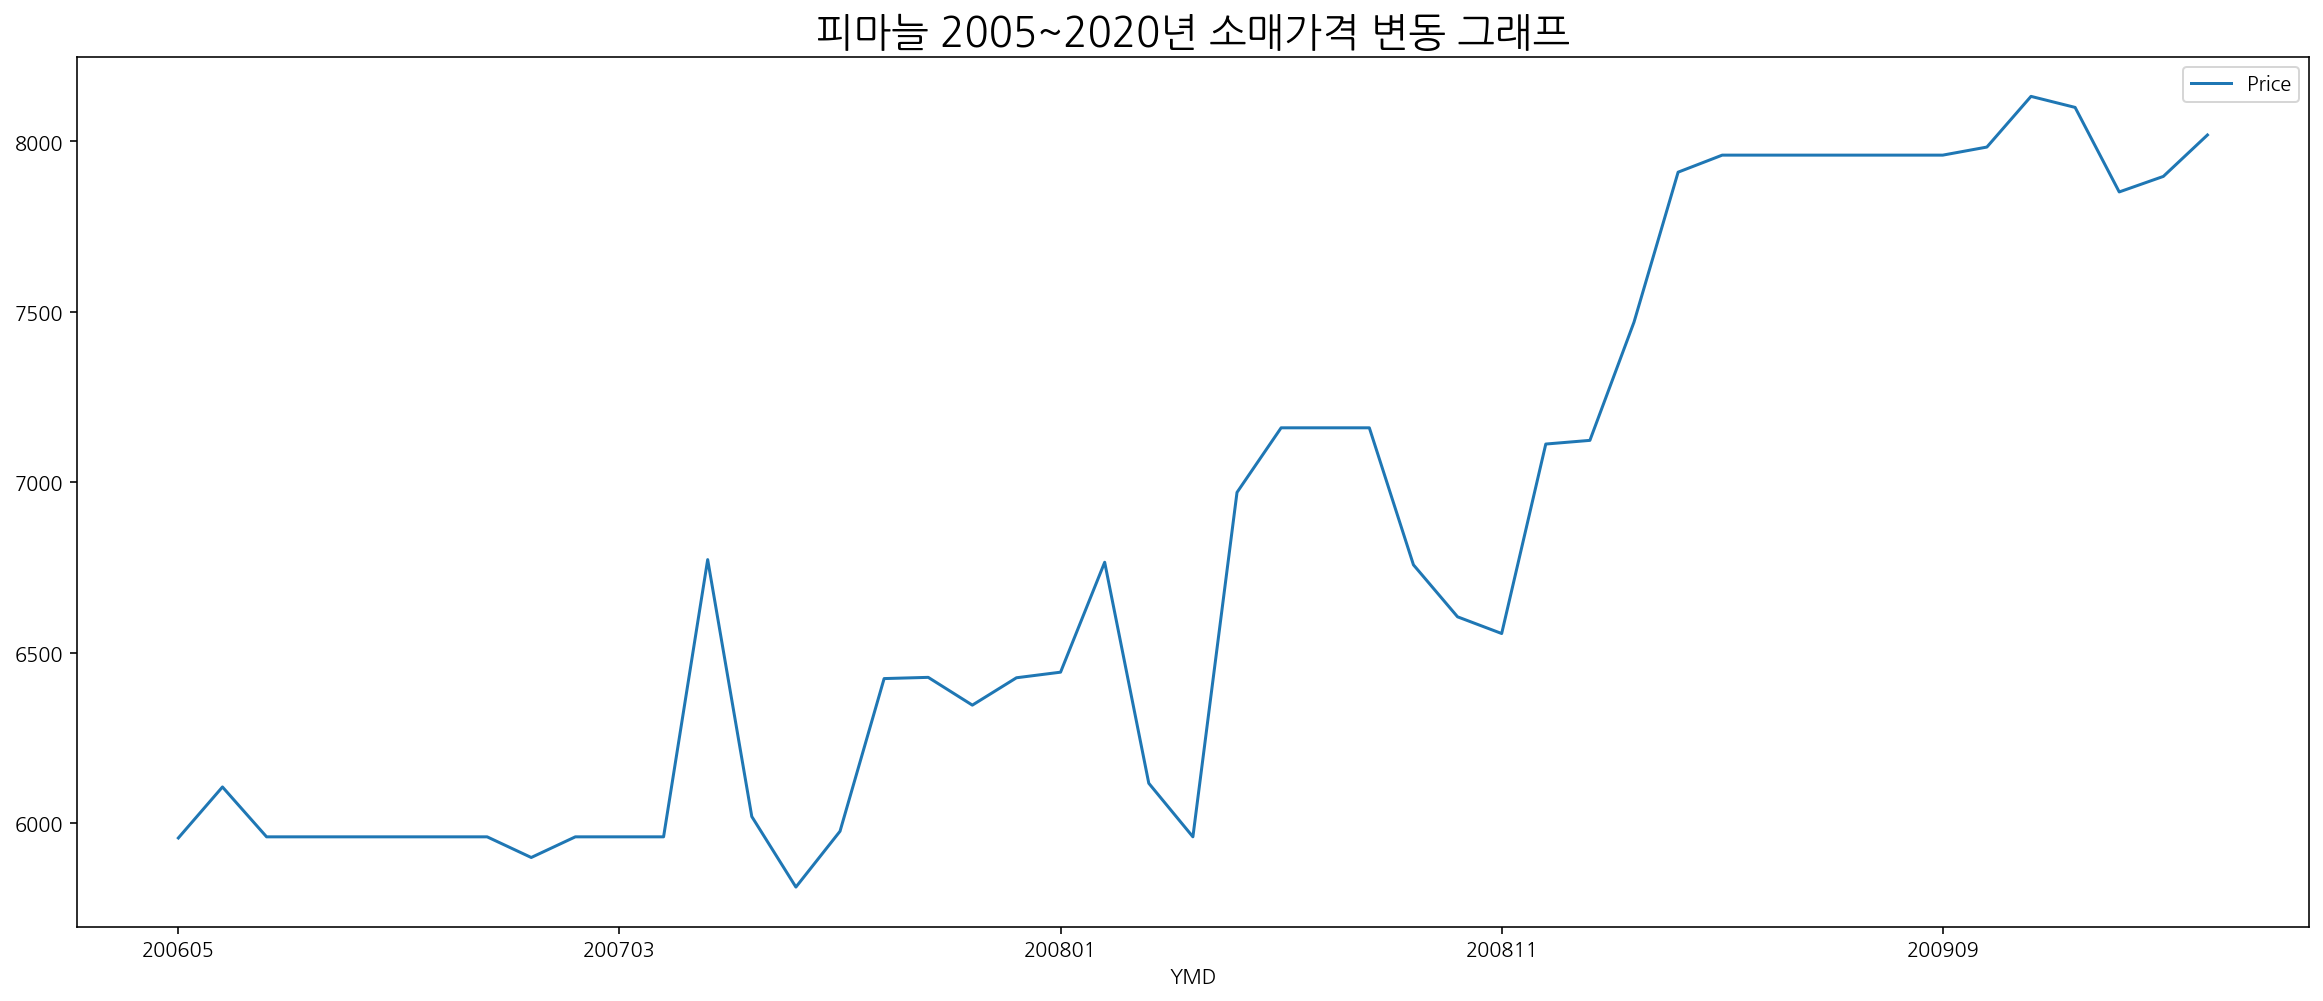

In [24]:
AgriMarket_AutoEDA("피마늘", (2005, 2020))

해당 일자에 제품의 소매 거래내역이 없습니다.


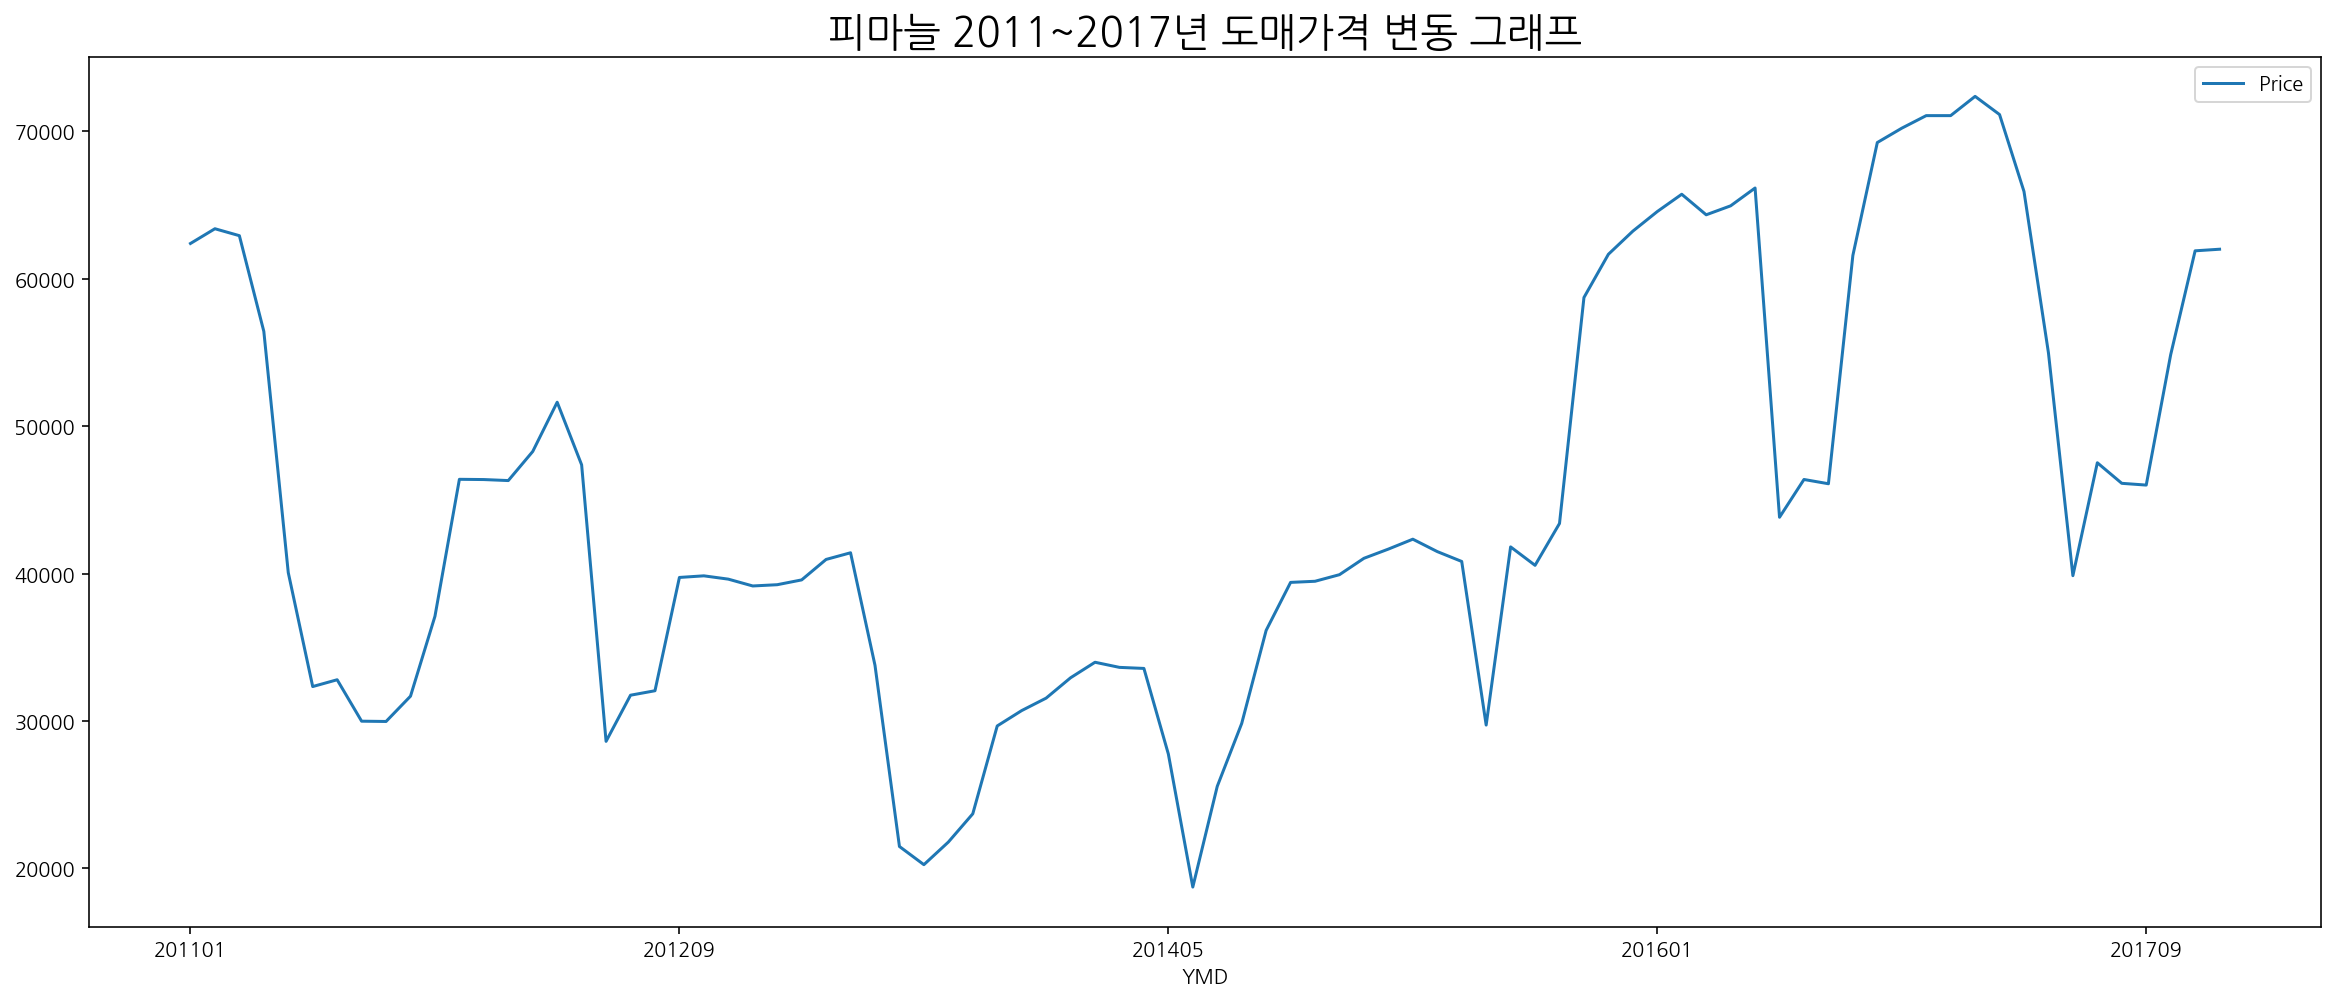

In [25]:
AgriMarket_AutoEDA("피마늘", (2011, 2017))